In [3]:
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser'])

## Use USPTO-2M dataset

In [4]:
df = pd.read_csv('../USPTO-2M/uspto_2m.tsv', sep='\t')

In [5]:
df.head()

,Subclass_labels,Abstract,Title,No
0,"'G05B', 'H01L'",an apparatus for generating a saddle shaped tr...,saddle shaped trajectory generator for two int...,US08536817
1,'A61M',the present invention provides apparatus and m...,balloon insertion apparatus and method of seal...,US08382794
2,'A01K',a restraint system for an animal comprising a ...,retractable leash and restraint assembly,US08474414
3,"'B29C', 'B65D'",a container or tray having various features th...,container having a rim or other feature encaps...,US08540111
4,'A61K',the present invention relates to a process for...,process for the preparation or purification of...,US08592474


In [ ]:
#only keep digital patent numbers
#df['No'] = df['No'].map(lambda x: x[3:])

In [6]:
df = df.dropna().reset_index(drop=True)
len(df)

1998372

In [7]:
df.columns

Index(['Subclass_labels', 'Abstract', 'Title', 'No'], dtype='object')

In [8]:
abst_list = list(df['Abstract'])
title_list = list(df['Title'])
all_contents = abst_list + title_list

In [9]:
len(all_contents)

3996744

In [10]:
all_contents[0:2]

['an apparatus for generating a saddle shaped trajectory for intersection of two cylindrical conduits the apparatus includes an encoder module a motorized axial module connected with the encoder module and movable only in a direction parallel to a longitudinal axis of an intersecting cylindrical conduit and a motorized rotatable module connected with the motorized axial module and rotatable around the longitudinal axis of the intersecting cylindrical conduit control software provided in one of the modules includes an algorithm providing control of the modules for generation of the saddle shaped trajectory on the two cylindrical conduits the algorithm requires input of only a radius of each of the cylindrical conduits',
 'the present invention provides apparatus and methods of closing internal tissue punctures the apparatus and method provide for an introducer sheath having at least one side port enabling aspiration of an internal tissue puncture site and injection of a sealant']

## Preprocessing

In [11]:
import re
import time
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [12]:
#remove non-alphabetic characters
temp_all_contents = [re.sub('[^a-zA-Z]', ' ', str(item)).lower() for item in all_contents]

In [22]:
len(temp_all_contents)

3996744

In [15]:
#use Spacy for tokenization
start_time = time.time()

test_sentence = temp_all_contents[0:10000]
all_words_list = []
for sent in nlp.pipe(test_sentence, batch_size=50, n_threads=4):
    tmp_word_list = [token.text for token in sent]
    all_words_list.append(tmp_word_list)

print("--- %s seconds ---" % (time.time() - start_time))

--- 33.02270221710205 seconds ---


In [21]:
#use NLTK for tokenization - faster
start_time = time.time()
test_sentence = temp_all_contents[0:100000]
all_words = [word_tokenize(sent) for sent in test_sentence]
print("--- %s seconds ---" % (time.time() - start_time))

--- 47.26663303375244 seconds ---


In [23]:
start_time = time.time()
all_words_list = [word_tokenize(sent) for sent in temp_all_contents]
print("--- %s seconds ---" % (time.time() - start_time))

--- 1561.3763830661774 seconds ---


## Training the model - gensim word2vec

In [118]:
train_set = all_words_list[0:1998373]

In [119]:
from gensim.models import Word2Vec
import logging
import multiprocessing

cores = multiprocessing.cpu_count()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

start_time = time.time()
model = Word2Vec(train_set, 
                 size = 100,
                 sg = 1,
                 window = 5,
                 min_alpha = 0.001,
                 alpha  = 0.05,
                 workers=cores-1,
                 iter = 5
                )
print("--- %s seconds ---" % (time.time() - start_time))

2019-10-25 17:46:42,135 : INFO : collecting all words and their counts
2019-10-25 17:46:42,136 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-10-25 17:46:42,326 : INFO : PROGRESS: at sentence #10000, processed 1082890 words, keeping 21261 word types
2019-10-25 17:46:42,539 : INFO : PROGRESS: at sentence #20000, processed 2169038 words, keeping 28249 word types
2019-10-25 17:46:42,725 : INFO : PROGRESS: at sentence #30000, processed 3249716 words, keeping 33423 word types
2019-10-25 17:46:42,905 : INFO : PROGRESS: at sentence #40000, processed 4331923 words, keeping 37760 word types
2019-10-25 17:46:43,099 : INFO : PROGRESS: at sentence #50000, processed 5408860 words, keeping 41293 word types
2019-10-25 17:46:43,289 : INFO : PROGRESS: at sentence #60000, processed 6484902 words, keeping 44512 word types
2019-10-25 17:46:43,465 : INFO : PROGRESS: at sentence #70000, processed 7566320 words, keeping 47491 word types
2019-10-25 17:46:43,652 : INFO : PROGRE

2019-10-25 17:47:02,631 : INFO : PROGRESS: at sentence #710000, processed 77021995 words, keeping 132392 word types
2019-10-25 17:47:03,166 : INFO : PROGRESS: at sentence #720000, processed 78096358 words, keeping 133221 word types
2019-10-25 17:47:03,682 : INFO : PROGRESS: at sentence #730000, processed 79177537 words, keeping 134005 word types
2019-10-25 17:47:04,193 : INFO : PROGRESS: at sentence #740000, processed 80256505 words, keeping 134755 word types
2019-10-25 17:47:04,763 : INFO : PROGRESS: at sentence #750000, processed 81332117 words, keeping 135575 word types
2019-10-25 17:47:05,279 : INFO : PROGRESS: at sentence #760000, processed 82404134 words, keeping 136314 word types
2019-10-25 17:47:05,794 : INFO : PROGRESS: at sentence #770000, processed 83476264 words, keeping 136994 word types
2019-10-25 17:47:06,298 : INFO : PROGRESS: at sentence #780000, processed 84551763 words, keeping 137663 word types
2019-10-25 17:47:06,768 : INFO : PROGRESS: at sentence #790000, processe

2019-10-25 17:47:39,084 : INFO : PROGRESS: at sentence #1410000, processed 153298458 words, keeping 182182 word types
2019-10-25 17:47:39,587 : INFO : PROGRESS: at sentence #1420000, processed 154383419 words, keeping 182669 word types
2019-10-25 17:47:40,089 : INFO : PROGRESS: at sentence #1430000, processed 155465102 words, keeping 183207 word types
2019-10-25 17:47:40,585 : INFO : PROGRESS: at sentence #1440000, processed 156559290 words, keeping 183732 word types
2019-10-25 17:47:41,086 : INFO : PROGRESS: at sentence #1450000, processed 157642584 words, keeping 184238 word types
2019-10-25 17:47:41,572 : INFO : PROGRESS: at sentence #1460000, processed 158730812 words, keeping 184725 word types
2019-10-25 17:47:42,100 : INFO : PROGRESS: at sentence #1470000, processed 159821578 words, keeping 185218 word types
2019-10-25 17:47:42,591 : INFO : PROGRESS: at sentence #1480000, processed 160902946 words, keeping 185696 word types
2019-10-25 17:47:43,113 : INFO : PROGRESS: at sentence #

2019-10-25 17:48:34,421 : INFO : EPOCH 1 - PROGRESS: at 1.12% examples, 577068 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:48:35,459 : INFO : EPOCH 1 - PROGRESS: at 1.44% examples, 552069 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:48:36,484 : INFO : EPOCH 1 - PROGRESS: at 1.79% examples, 545599 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:48:37,486 : INFO : EPOCH 1 - PROGRESS: at 2.16% examples, 551557 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:48:38,497 : INFO : EPOCH 1 - PROGRESS: at 2.52% examples, 549972 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:48:39,528 : INFO : EPOCH 1 - PROGRESS: at 2.88% examples, 548429 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:48:40,545 : INFO : EPOCH 1 - PROGRESS: at 3.22% examples, 545758 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:48:41,572 : INFO : EPOCH 1 - PROGRESS: at 3.56% examples, 540942 words/s, in_qsize 11, out_qsize 2
2019-10-25 17:48:42,590 : INFO : EPOCH 1 - PROGRESS: at 3.91% examples, 540657 words/s, in_qsize

2019-10-25 17:49:48,477 : INFO : EPOCH 1 - PROGRESS: at 23.72% examples, 478644 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:49:49,518 : INFO : EPOCH 1 - PROGRESS: at 24.02% examples, 478188 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:49:50,548 : INFO : EPOCH 1 - PROGRESS: at 24.30% examples, 477546 words/s, in_qsize 13, out_qsize 3
2019-10-25 17:49:51,562 : INFO : EPOCH 1 - PROGRESS: at 24.62% examples, 477642 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:49:52,609 : INFO : EPOCH 1 - PROGRESS: at 24.93% examples, 477450 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:49:53,662 : INFO : EPOCH 1 - PROGRESS: at 25.25% examples, 477222 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:49:54,662 : INFO : EPOCH 1 - PROGRESS: at 25.56% examples, 477220 words/s, in_qsize 11, out_qsize 2
2019-10-25 17:49:55,738 : INFO : EPOCH 1 - PROGRESS: at 25.86% examples, 476700 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:49:56,746 : INFO : EPOCH 1 - PROGRESS: at 26.15% examples, 476319 words/s,

2019-10-25 17:51:01,973 : INFO : EPOCH 1 - PROGRESS: at 44.86% examples, 461423 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:51:02,986 : INFO : EPOCH 1 - PROGRESS: at 45.14% examples, 461147 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:51:03,999 : INFO : EPOCH 1 - PROGRESS: at 45.41% examples, 460742 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:51:05,031 : INFO : EPOCH 1 - PROGRESS: at 45.70% examples, 460517 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:51:06,051 : INFO : EPOCH 1 - PROGRESS: at 45.97% examples, 460241 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:51:07,062 : INFO : EPOCH 1 - PROGRESS: at 46.26% examples, 460083 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:51:08,106 : INFO : EPOCH 1 - PROGRESS: at 46.52% examples, 459549 words/s, in_qsize 14, out_qsize 1
2019-10-25 17:51:09,120 : INFO : EPOCH 1 - PROGRESS: at 46.82% examples, 459522 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:51:10,132 : INFO : EPOCH 1 - PROGRESS: at 47.11% examples, 459369 words/s,

2019-10-25 17:52:15,316 : INFO : EPOCH 1 - PROGRESS: at 64.90% examples, 451015 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:52:16,334 : INFO : EPOCH 1 - PROGRESS: at 65.16% examples, 450782 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:52:17,346 : INFO : EPOCH 1 - PROGRESS: at 65.43% examples, 450653 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:52:18,361 : INFO : EPOCH 1 - PROGRESS: at 65.71% examples, 450515 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:52:19,368 : INFO : EPOCH 1 - PROGRESS: at 65.97% examples, 450332 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:52:20,374 : INFO : EPOCH 1 - PROGRESS: at 66.26% examples, 450281 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:52:21,380 : INFO : EPOCH 1 - PROGRESS: at 66.53% examples, 450164 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:52:22,398 : INFO : EPOCH 1 - PROGRESS: at 66.77% examples, 449811 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:52:23,467 : INFO : EPOCH 1 - PROGRESS: at 67.06% examples, 449670 words/s,

2019-10-25 17:53:29,178 : INFO : EPOCH 1 - PROGRESS: at 80.82% examples, 422038 words/s, in_qsize 11, out_qsize 2
2019-10-25 17:53:30,178 : INFO : EPOCH 1 - PROGRESS: at 81.04% examples, 421818 words/s, in_qsize 11, out_qsize 2
2019-10-25 17:53:31,221 : INFO : EPOCH 1 - PROGRESS: at 81.30% examples, 421680 words/s, in_qsize 14, out_qsize 2
2019-10-25 17:53:32,242 : INFO : EPOCH 1 - PROGRESS: at 81.54% examples, 421502 words/s, in_qsize 14, out_qsize 1
2019-10-25 17:53:33,248 : INFO : EPOCH 1 - PROGRESS: at 81.79% examples, 421395 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:53:34,264 : INFO : EPOCH 1 - PROGRESS: at 82.06% examples, 421371 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:53:35,272 : INFO : EPOCH 1 - PROGRESS: at 82.33% examples, 421335 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:53:36,282 : INFO : EPOCH 1 - PROGRESS: at 82.59% examples, 421295 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:53:37,308 : INFO : EPOCH 1 - PROGRESS: at 82.86% examples, 421256 words/s,

2019-10-25 17:54:42,804 : INFO : EPOCH 1 - PROGRESS: at 97.82% examples, 409615 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:54:43,815 : INFO : EPOCH 1 - PROGRESS: at 98.05% examples, 409442 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:54:44,844 : INFO : EPOCH 1 - PROGRESS: at 98.27% examples, 409247 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:54:45,862 : INFO : EPOCH 1 - PROGRESS: at 98.51% examples, 409104 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:54:46,868 : INFO : EPOCH 1 - PROGRESS: at 98.72% examples, 408881 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:54:47,893 : INFO : EPOCH 1 - PROGRESS: at 98.95% examples, 408753 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:54:48,895 : INFO : EPOCH 1 - PROGRESS: at 99.19% examples, 408630 words/s, in_qsize 13, out_qsize 1
2019-10-25 17:54:49,949 : INFO : EPOCH 1 - PROGRESS: at 99.40% examples, 408339 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:54:50,959 : INFO : EPOCH 1 - PROGRESS: at 99.62% examples, 408154 words/s,

2019-10-25 17:55:51,127 : INFO : EPOCH 2 - PROGRESS: at 11.36% examples, 300024 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:55:52,167 : INFO : EPOCH 2 - PROGRESS: at 11.49% examples, 297876 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:55:53,189 : INFO : EPOCH 2 - PROGRESS: at 11.70% examples, 298264 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:55:54,213 : INFO : EPOCH 2 - PROGRESS: at 11.89% examples, 298260 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:55:55,246 : INFO : EPOCH 2 - PROGRESS: at 12.11% examples, 298662 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:55:56,248 : INFO : EPOCH 2 - PROGRESS: at 12.35% examples, 299764 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:55:57,285 : INFO : EPOCH 2 - PROGRESS: at 12.58% examples, 300551 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:55:58,293 : INFO : EPOCH 2 - PROGRESS: at 12.82% examples, 301473 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:55:59,306 : INFO : EPOCH 2 - PROGRESS: at 13.05% examples, 302437 words/s,

2019-10-25 17:57:04,722 : INFO : EPOCH 2 - PROGRESS: at 26.20% examples, 308236 words/s, in_qsize 11, out_qsize 2
2019-10-25 17:57:05,744 : INFO : EPOCH 2 - PROGRESS: at 26.39% examples, 308010 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:57:06,754 : INFO : EPOCH 2 - PROGRESS: at 26.59% examples, 308025 words/s, in_qsize 10, out_qsize 3
2019-10-25 17:57:07,819 : INFO : EPOCH 2 - PROGRESS: at 26.81% examples, 308182 words/s, in_qsize 14, out_qsize 3
2019-10-25 17:57:08,861 : INFO : EPOCH 2 - PROGRESS: at 27.06% examples, 308701 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:57:09,870 : INFO : EPOCH 2 - PROGRESS: at 27.32% examples, 309277 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:57:10,930 : INFO : EPOCH 2 - PROGRESS: at 27.56% examples, 309582 words/s, in_qsize 14, out_qsize 1
2019-10-25 17:57:11,997 : INFO : EPOCH 2 - PROGRESS: at 27.81% examples, 310120 words/s, in_qsize 14, out_qsize 2
2019-10-25 17:57:13,020 : INFO : EPOCH 2 - PROGRESS: at 28.07% examples, 310696 words/s,

2019-10-25 17:58:18,075 : INFO : EPOCH 2 - PROGRESS: at 44.29% examples, 333788 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:58:19,088 : INFO : EPOCH 2 - PROGRESS: at 44.55% examples, 334146 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:58:20,195 : INFO : EPOCH 2 - PROGRESS: at 44.84% examples, 334479 words/s, in_qsize 11, out_qsize 2
2019-10-25 17:58:21,235 : INFO : EPOCH 2 - PROGRESS: at 45.11% examples, 334785 words/s, in_qsize 14, out_qsize 2
2019-10-25 17:58:22,237 : INFO : EPOCH 2 - PROGRESS: at 45.36% examples, 335047 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:58:23,248 : INFO : EPOCH 2 - PROGRESS: at 45.60% examples, 335158 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:58:24,288 : INFO : EPOCH 2 - PROGRESS: at 45.86% examples, 335394 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:58:25,341 : INFO : EPOCH 2 - PROGRESS: at 46.14% examples, 335706 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:58:26,377 : INFO : EPOCH 2 - PROGRESS: at 46.41% examples, 336005 words/s,

2019-10-25 17:59:31,758 : INFO : EPOCH 2 - PROGRESS: at 59.18% examples, 329267 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:59:32,767 : INFO : EPOCH 2 - PROGRESS: at 59.36% examples, 329102 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:59:33,812 : INFO : EPOCH 2 - PROGRESS: at 59.55% examples, 328947 words/s, in_qsize 13, out_qsize 0
2019-10-25 17:59:34,825 : INFO : EPOCH 2 - PROGRESS: at 59.74% examples, 328854 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:59:35,832 : INFO : EPOCH 2 - PROGRESS: at 59.91% examples, 328614 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:59:36,856 : INFO : EPOCH 2 - PROGRESS: at 60.06% examples, 328285 words/s, in_qsize 12, out_qsize 1
2019-10-25 17:59:37,867 : INFO : EPOCH 2 - PROGRESS: at 60.21% examples, 327994 words/s, in_qsize 13, out_qsize 2
2019-10-25 17:59:38,980 : INFO : EPOCH 2 - PROGRESS: at 60.38% examples, 327665 words/s, in_qsize 14, out_qsize 0
2019-10-25 17:59:40,105 : INFO : EPOCH 2 - PROGRESS: at 60.54% examples, 327231 words/s,

2019-10-25 18:00:45,972 : INFO : EPOCH 2 - PROGRESS: at 70.59% examples, 310820 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:00:47,016 : INFO : EPOCH 2 - PROGRESS: at 70.79% examples, 310768 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:00:48,020 : INFO : EPOCH 2 - PROGRESS: at 71.01% examples, 310849 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:00:49,039 : INFO : EPOCH 2 - PROGRESS: at 71.24% examples, 310959 words/s, in_qsize 14, out_qsize 2
2019-10-25 18:00:50,064 : INFO : EPOCH 2 - PROGRESS: at 71.45% examples, 310963 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:00:51,070 : INFO : EPOCH 2 - PROGRESS: at 71.69% examples, 311142 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:00:52,072 : INFO : EPOCH 2 - PROGRESS: at 71.90% examples, 311222 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:00:53,093 : INFO : EPOCH 2 - PROGRESS: at 72.11% examples, 311228 words/s, in_qsize 14, out_qsize 2
2019-10-25 18:00:54,106 : INFO : EPOCH 2 - PROGRESS: at 72.36% examples, 311438 words/s,

2019-10-25 18:01:59,350 : INFO : EPOCH 2 - PROGRESS: at 86.67% examples, 315968 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:02:00,372 : INFO : EPOCH 2 - PROGRESS: at 86.85% examples, 315863 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:02:01,389 : INFO : EPOCH 2 - PROGRESS: at 87.04% examples, 315813 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:02:02,396 : INFO : EPOCH 2 - PROGRESS: at 87.18% examples, 315571 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:02:03,445 : INFO : EPOCH 2 - PROGRESS: at 87.39% examples, 315564 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:02:04,472 : INFO : EPOCH 2 - PROGRESS: at 87.62% examples, 315638 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:02:05,490 : INFO : EPOCH 2 - PROGRESS: at 87.83% examples, 315670 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:02:06,516 : INFO : EPOCH 2 - PROGRESS: at 88.07% examples, 315795 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:02:07,563 : INFO : EPOCH 2 - PROGRESS: at 88.33% examples, 315953 words/s,

2019-10-25 18:03:06,931 : INFO : EPOCH 3 - PROGRESS: at 2.38% examples, 301099 words/s, in_qsize 14, out_qsize 2
2019-10-25 18:03:07,969 : INFO : EPOCH 3 - PROGRESS: at 2.65% examples, 308553 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:03:08,976 : INFO : EPOCH 3 - PROGRESS: at 2.92% examples, 315634 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:03:09,982 : INFO : EPOCH 3 - PROGRESS: at 3.18% examples, 320903 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:03:11,012 : INFO : EPOCH 3 - PROGRESS: at 3.45% examples, 326348 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:03:12,026 : INFO : EPOCH 3 - PROGRESS: at 3.71% examples, 330614 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:03:13,082 : INFO : EPOCH 3 - PROGRESS: at 3.97% examples, 333273 words/s, in_qsize 14, out_qsize 3
2019-10-25 18:03:14,100 : INFO : EPOCH 3 - PROGRESS: at 4.24% examples, 337398 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:03:15,129 : INFO : EPOCH 3 - PROGRESS: at 4.52% examples, 341247 words/s, in_qsize

2019-10-25 18:04:21,582 : INFO : EPOCH 3 - PROGRESS: at 20.63% examples, 368950 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:04:22,587 : INFO : EPOCH 3 - PROGRESS: at 20.89% examples, 369275 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:04:23,593 : INFO : EPOCH 3 - PROGRESS: at 21.13% examples, 369431 words/s, in_qsize 14, out_qsize 1
2019-10-25 18:04:24,613 : INFO : EPOCH 3 - PROGRESS: at 21.39% examples, 369765 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:04:25,681 : INFO : EPOCH 3 - PROGRESS: at 21.65% examples, 369962 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:04:26,700 : INFO : EPOCH 3 - PROGRESS: at 21.92% examples, 370369 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:04:27,710 : INFO : EPOCH 3 - PROGRESS: at 22.18% examples, 370709 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:04:28,757 : INFO : EPOCH 3 - PROGRESS: at 22.45% examples, 370969 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:04:29,803 : INFO : EPOCH 3 - PROGRESS: at 22.70% examples, 371075 words/s,

2019-10-25 18:05:35,143 : INFO : EPOCH 3 - PROGRESS: at 39.12% examples, 378049 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:05:36,177 : INFO : EPOCH 3 - PROGRESS: at 39.34% examples, 377740 words/s, in_qsize 14, out_qsize 1
2019-10-25 18:05:37,186 : INFO : EPOCH 3 - PROGRESS: at 39.56% examples, 377484 words/s, in_qsize 14, out_qsize 2
2019-10-25 18:05:38,191 : INFO : EPOCH 3 - PROGRESS: at 39.79% examples, 377296 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:05:39,220 : INFO : EPOCH 3 - PROGRESS: at 40.03% examples, 377141 words/s, in_qsize 14, out_qsize 1
2019-10-25 18:05:40,236 : INFO : EPOCH 3 - PROGRESS: at 40.29% examples, 377269 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:05:41,253 : INFO : EPOCH 3 - PROGRESS: at 40.54% examples, 377310 words/s, in_qsize 14, out_qsize 1
2019-10-25 18:05:42,296 : INFO : EPOCH 3 - PROGRESS: at 40.81% examples, 377337 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:05:43,297 : INFO : EPOCH 3 - PROGRESS: at 41.07% examples, 377455 words/s,

2019-10-25 18:06:48,553 : INFO : EPOCH 3 - PROGRESS: at 57.38% examples, 380597 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:06:49,571 : INFO : EPOCH 3 - PROGRESS: at 57.63% examples, 380683 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:06:50,608 : INFO : EPOCH 3 - PROGRESS: at 57.89% examples, 380764 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:06:51,664 : INFO : EPOCH 3 - PROGRESS: at 58.15% examples, 380873 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:06:52,671 : INFO : EPOCH 3 - PROGRESS: at 58.40% examples, 380968 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:06:53,700 : INFO : EPOCH 3 - PROGRESS: at 58.64% examples, 380967 words/s, in_qsize 14, out_qsize 2
2019-10-25 18:06:54,763 : INFO : EPOCH 3 - PROGRESS: at 58.92% examples, 381064 words/s, in_qsize 11, out_qsize 2
2019-10-25 18:06:55,783 : INFO : EPOCH 3 - PROGRESS: at 59.17% examples, 381202 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:06:56,793 : INFO : EPOCH 3 - PROGRESS: at 59.43% examples, 381289 words/s,

2019-10-25 18:08:02,052 : INFO : EPOCH 3 - PROGRESS: at 76.33% examples, 386357 words/s, in_qsize 11, out_qsize 2
2019-10-25 18:08:03,065 : INFO : EPOCH 3 - PROGRESS: at 76.61% examples, 386496 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:08:04,074 : INFO : EPOCH 3 - PROGRESS: at 76.89% examples, 386637 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:08:05,142 : INFO : EPOCH 3 - PROGRESS: at 77.18% examples, 386750 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:08:06,166 : INFO : EPOCH 3 - PROGRESS: at 77.45% examples, 386803 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:08:07,167 : INFO : EPOCH 3 - PROGRESS: at 77.72% examples, 386909 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:08:08,212 : INFO : EPOCH 3 - PROGRESS: at 77.98% examples, 386912 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:08:09,223 : INFO : EPOCH 3 - PROGRESS: at 78.25% examples, 386996 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:08:10,228 : INFO : EPOCH 3 - PROGRESS: at 78.51% examples, 387023 words/s,

2019-10-25 18:09:15,393 : INFO : EPOCH 3 - PROGRESS: at 95.01% examples, 388121 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:09:16,412 : INFO : EPOCH 3 - PROGRESS: at 95.26% examples, 388131 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:09:17,425 : INFO : EPOCH 3 - PROGRESS: at 95.50% examples, 388072 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:09:18,434 : INFO : EPOCH 3 - PROGRESS: at 95.77% examples, 388147 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:09:19,441 : INFO : EPOCH 3 - PROGRESS: at 96.05% examples, 388244 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:09:20,454 : INFO : EPOCH 3 - PROGRESS: at 96.33% examples, 388351 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:09:21,461 : INFO : EPOCH 3 - PROGRESS: at 96.59% examples, 388390 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:09:22,486 : INFO : EPOCH 3 - PROGRESS: at 96.84% examples, 388373 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:09:23,515 : INFO : EPOCH 3 - PROGRESS: at 97.11% examples, 388389 words/s,

2019-10-25 18:10:22,692 : INFO : EPOCH 4 - PROGRESS: at 12.42% examples, 400930 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:10:23,727 : INFO : EPOCH 4 - PROGRESS: at 12.68% examples, 400433 words/s, in_qsize 13, out_qsize 3
2019-10-25 18:10:24,748 : INFO : EPOCH 4 - PROGRESS: at 12.94% examples, 400509 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:10:25,761 : INFO : EPOCH 4 - PROGRESS: at 13.19% examples, 399924 words/s, in_qsize 14, out_qsize 1
2019-10-25 18:10:26,783 : INFO : EPOCH 4 - PROGRESS: at 13.45% examples, 399996 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:10:27,792 : INFO : EPOCH 4 - PROGRESS: at 13.71% examples, 399897 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:10:28,797 : INFO : EPOCH 4 - PROGRESS: at 13.98% examples, 399968 words/s, in_qsize 14, out_qsize 1
2019-10-25 18:10:29,849 : INFO : EPOCH 4 - PROGRESS: at 14.25% examples, 400083 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:10:30,851 : INFO : EPOCH 4 - PROGRESS: at 14.51% examples, 400315 words/s,

2019-10-25 18:11:36,307 : INFO : EPOCH 4 - PROGRESS: at 30.82% examples, 394096 words/s, in_qsize 11, out_qsize 2
2019-10-25 18:11:37,308 : INFO : EPOCH 4 - PROGRESS: at 31.09% examples, 394305 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:11:38,338 : INFO : EPOCH 4 - PROGRESS: at 31.36% examples, 394422 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:11:39,344 : INFO : EPOCH 4 - PROGRESS: at 31.60% examples, 394268 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:11:40,347 : INFO : EPOCH 4 - PROGRESS: at 31.85% examples, 394234 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:11:41,368 : INFO : EPOCH 4 - PROGRESS: at 32.11% examples, 394202 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:11:42,394 : INFO : EPOCH 4 - PROGRESS: at 32.37% examples, 394153 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:11:43,404 : INFO : EPOCH 4 - PROGRESS: at 32.61% examples, 394043 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:11:44,411 : INFO : EPOCH 4 - PROGRESS: at 32.88% examples, 394117 words/s,

2019-10-25 18:12:49,539 : INFO : EPOCH 4 - PROGRESS: at 49.53% examples, 393641 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:12:50,539 : INFO : EPOCH 4 - PROGRESS: at 49.79% examples, 393739 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:12:51,563 : INFO : EPOCH 4 - PROGRESS: at 50.07% examples, 393934 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:12:52,596 : INFO : EPOCH 4 - PROGRESS: at 50.37% examples, 394219 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:12:53,620 : INFO : EPOCH 4 - PROGRESS: at 50.64% examples, 394379 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:12:54,625 : INFO : EPOCH 4 - PROGRESS: at 50.92% examples, 394534 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:12:55,638 : INFO : EPOCH 4 - PROGRESS: at 51.18% examples, 394640 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:12:56,655 : INFO : EPOCH 4 - PROGRESS: at 51.44% examples, 394627 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:12:57,667 : INFO : EPOCH 4 - PROGRESS: at 51.69% examples, 394550 words/s,

2019-10-25 18:14:03,267 : INFO : EPOCH 4 - PROGRESS: at 67.09% examples, 388819 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:14:04,278 : INFO : EPOCH 4 - PROGRESS: at 67.36% examples, 388918 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:14:05,298 : INFO : EPOCH 4 - PROGRESS: at 67.62% examples, 388950 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:14:06,309 : INFO : EPOCH 4 - PROGRESS: at 67.88% examples, 389021 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:14:07,321 : INFO : EPOCH 4 - PROGRESS: at 68.13% examples, 389010 words/s, in_qsize 14, out_qsize 1
2019-10-25 18:14:08,404 : INFO : EPOCH 4 - PROGRESS: at 68.40% examples, 388976 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:14:09,409 : INFO : EPOCH 4 - PROGRESS: at 68.66% examples, 389031 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:14:10,493 : INFO : EPOCH 4 - PROGRESS: at 68.84% examples, 388533 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:14:11,504 : INFO : EPOCH 4 - PROGRESS: at 68.90% examples, 387450 words/s,

2019-10-25 18:15:17,773 : INFO : EPOCH 4 - PROGRESS: at 81.20% examples, 368130 words/s, in_qsize 14, out_qsize 3
2019-10-25 18:15:18,792 : INFO : EPOCH 4 - PROGRESS: at 81.37% examples, 367846 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:15:19,825 : INFO : EPOCH 4 - PROGRESS: at 81.59% examples, 367716 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:15:20,826 : INFO : EPOCH 4 - PROGRESS: at 81.83% examples, 367743 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:15:21,830 : INFO : EPOCH 4 - PROGRESS: at 82.06% examples, 367728 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:15:22,858 : INFO : EPOCH 4 - PROGRESS: at 82.30% examples, 367727 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:15:23,873 : INFO : EPOCH 4 - PROGRESS: at 82.54% examples, 367742 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:15:24,911 : INFO : EPOCH 4 - PROGRESS: at 82.77% examples, 367647 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:15:25,991 : INFO : EPOCH 4 - PROGRESS: at 83.00% examples, 367570 words/s,

2019-10-25 18:16:31,635 : INFO : EPOCH 4 - PROGRESS: at 97.72% examples, 364593 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:16:32,637 : INFO : EPOCH 4 - PROGRESS: at 97.99% examples, 364693 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:16:33,645 : INFO : EPOCH 4 - PROGRESS: at 98.22% examples, 364664 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:16:34,688 : INFO : EPOCH 4 - PROGRESS: at 98.49% examples, 364759 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:16:35,760 : INFO : EPOCH 4 - PROGRESS: at 98.73% examples, 364743 words/s, in_qsize 11, out_qsize 2
2019-10-25 18:16:36,787 : INFO : EPOCH 4 - PROGRESS: at 99.00% examples, 364817 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:16:37,792 : INFO : EPOCH 4 - PROGRESS: at 99.24% examples, 364861 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:16:38,860 : INFO : EPOCH 4 - PROGRESS: at 99.51% examples, 364898 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:16:39,899 : INFO : EPOCH 4 - PROGRESS: at 99.77% examples, 364979 words/s,

2019-10-25 18:17:39,830 : INFO : EPOCH 5 - PROGRESS: at 14.52% examples, 379836 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:17:40,848 : INFO : EPOCH 5 - PROGRESS: at 14.75% examples, 379337 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:17:41,910 : INFO : EPOCH 5 - PROGRESS: at 14.99% examples, 378925 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:17:42,919 : INFO : EPOCH 5 - PROGRESS: at 15.23% examples, 378869 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:17:43,920 : INFO : EPOCH 5 - PROGRESS: at 15.48% examples, 378969 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:17:44,980 : INFO : EPOCH 5 - PROGRESS: at 15.71% examples, 378596 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:17:46,018 : INFO : EPOCH 5 - PROGRESS: at 15.95% examples, 378371 words/s, in_qsize 14, out_qsize 1
2019-10-25 18:17:47,089 : INFO : EPOCH 5 - PROGRESS: at 16.11% examples, 376030 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:17:48,091 : INFO : EPOCH 5 - PROGRESS: at 16.33% examples, 375527 words/s,

2019-10-25 18:18:53,357 : INFO : EPOCH 5 - PROGRESS: at 31.53% examples, 369356 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:18:54,475 : INFO : EPOCH 5 - PROGRESS: at 31.76% examples, 368923 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:18:55,515 : INFO : EPOCH 5 - PROGRESS: at 31.95% examples, 368292 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:18:56,523 : INFO : EPOCH 5 - PROGRESS: at 32.18% examples, 368178 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:18:57,555 : INFO : EPOCH 5 - PROGRESS: at 32.41% examples, 368003 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:18:58,582 : INFO : EPOCH 5 - PROGRESS: at 32.66% examples, 368048 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:18:59,592 : INFO : EPOCH 5 - PROGRESS: at 32.90% examples, 368038 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:19:00,598 : INFO : EPOCH 5 - PROGRESS: at 33.16% examples, 368242 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:19:01,609 : INFO : EPOCH 5 - PROGRESS: at 33.42% examples, 368471 words/s,

2019-10-25 18:20:06,706 : INFO : EPOCH 5 - PROGRESS: at 49.51% examples, 371974 words/s, in_qsize 14, out_qsize 1
2019-10-25 18:20:07,708 : INFO : EPOCH 5 - PROGRESS: at 49.77% examples, 372137 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:20:08,708 : INFO : EPOCH 5 - PROGRESS: at 50.03% examples, 372332 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:20:09,722 : INFO : EPOCH 5 - PROGRESS: at 50.27% examples, 372335 words/s, in_qsize 11, out_qsize 2
2019-10-25 18:20:10,780 : INFO : EPOCH 5 - PROGRESS: at 50.55% examples, 372527 words/s, in_qsize 13, out_qsize 3
2019-10-25 18:20:11,784 : INFO : EPOCH 5 - PROGRESS: at 50.83% examples, 372812 words/s, in_qsize 11, out_qsize 2
2019-10-25 18:20:12,806 : INFO : EPOCH 5 - PROGRESS: at 51.10% examples, 373066 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:20:13,806 : INFO : EPOCH 5 - PROGRESS: at 51.36% examples, 373184 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:20:14,819 : INFO : EPOCH 5 - PROGRESS: at 51.60% examples, 373215 words/s,

2019-10-25 18:21:20,129 : INFO : EPOCH 5 - PROGRESS: at 67.81% examples, 377612 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:21:21,179 : INFO : EPOCH 5 - PROGRESS: at 68.07% examples, 377643 words/s, in_qsize 14, out_qsize 2
2019-10-25 18:21:22,187 : INFO : EPOCH 5 - PROGRESS: at 68.33% examples, 377730 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:21:23,213 : INFO : EPOCH 5 - PROGRESS: at 68.58% examples, 377694 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:21:24,238 : INFO : EPOCH 5 - PROGRESS: at 68.82% examples, 377709 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:21:25,241 : INFO : EPOCH 5 - PROGRESS: at 69.08% examples, 377804 words/s, in_qsize 14, out_qsize 0
2019-10-25 18:21:26,268 : INFO : EPOCH 5 - PROGRESS: at 69.34% examples, 377839 words/s, in_qsize 11, out_qsize 2
2019-10-25 18:21:27,325 : INFO : EPOCH 5 - PROGRESS: at 69.60% examples, 377836 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:21:28,357 : INFO : EPOCH 5 - PROGRESS: at 69.86% examples, 377888 words/s,

2019-10-25 18:22:33,839 : INFO : EPOCH 5 - PROGRESS: at 86.10% examples, 379293 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:22:34,853 : INFO : EPOCH 5 - PROGRESS: at 86.30% examples, 379073 words/s, in_qsize 12, out_qsize 1
2019-10-25 18:22:35,892 : INFO : EPOCH 5 - PROGRESS: at 86.51% examples, 378889 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:22:36,913 : INFO : EPOCH 5 - PROGRESS: at 86.64% examples, 378383 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:22:37,958 : INFO : EPOCH 5 - PROGRESS: at 86.85% examples, 378214 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:22:38,964 : INFO : EPOCH 5 - PROGRESS: at 87.08% examples, 378148 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:22:39,978 : INFO : EPOCH 5 - PROGRESS: at 87.31% examples, 378095 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:22:40,981 : INFO : EPOCH 5 - PROGRESS: at 87.55% examples, 378071 words/s, in_qsize 13, out_qsize 0
2019-10-25 18:22:42,013 : INFO : EPOCH 5 - PROGRESS: at 87.79% examples, 378036 words/s,

--- 2207.6637060642242 seconds ---


In [121]:
#save the model
model.wv.save_word2vec_format('uspto_2m_abstract_word2vec.bin', binary=True)

2019-10-25 18:32:17,227 : INFO : storing 85446x100 projection weights into uspto_2m_abstract_word2vec.bin


In [126]:
model.wv.similarity('computer','program')

0.7341015

In [136]:
#analogy
model.wv.most_similar(positive=['bottle', 'chip'], negative=['computer'], topn=1)

[('cup', 0.6145753264427185)]

## Visualization

### 1. PCA

In [166]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
len(model.wv.vocab)

85446

In [220]:
selected_words = ['physics', 'chemistry', 'vehicle', 'plastics', 'hygiene', 'photography', 'electric']
words = selected_words.copy()
similar_words = {}
for key in selected_words:
    similar_words[key] = [item[0] for item in model.wv.most_similar(key, topn=5)]

In [221]:
similar_words['physics']

['simulations', 'geostatistical', 'simulation', 'theory', 'modeling']

In [222]:
for key,value in similar_words.items():
    words = words + value
    
#get vectors for all the words
sample_wv = model.wv[words]

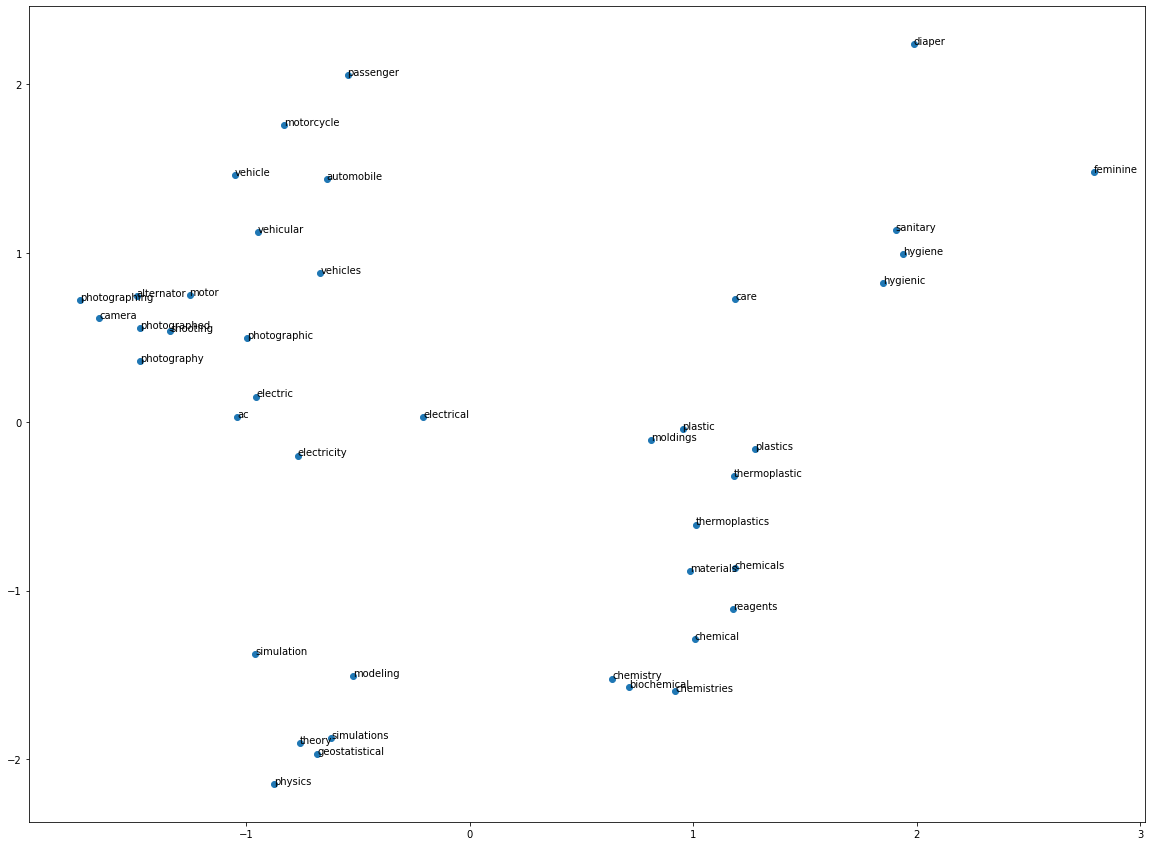

In [254]:
fig = plt.figure(1, figsize=(20, 15))
pca = PCA(n_components=2)
result = pca.fit_transform(sample_wv)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

### 2. t-SNE

In [229]:
from sklearn.manifold import TSNE
import numpy as np

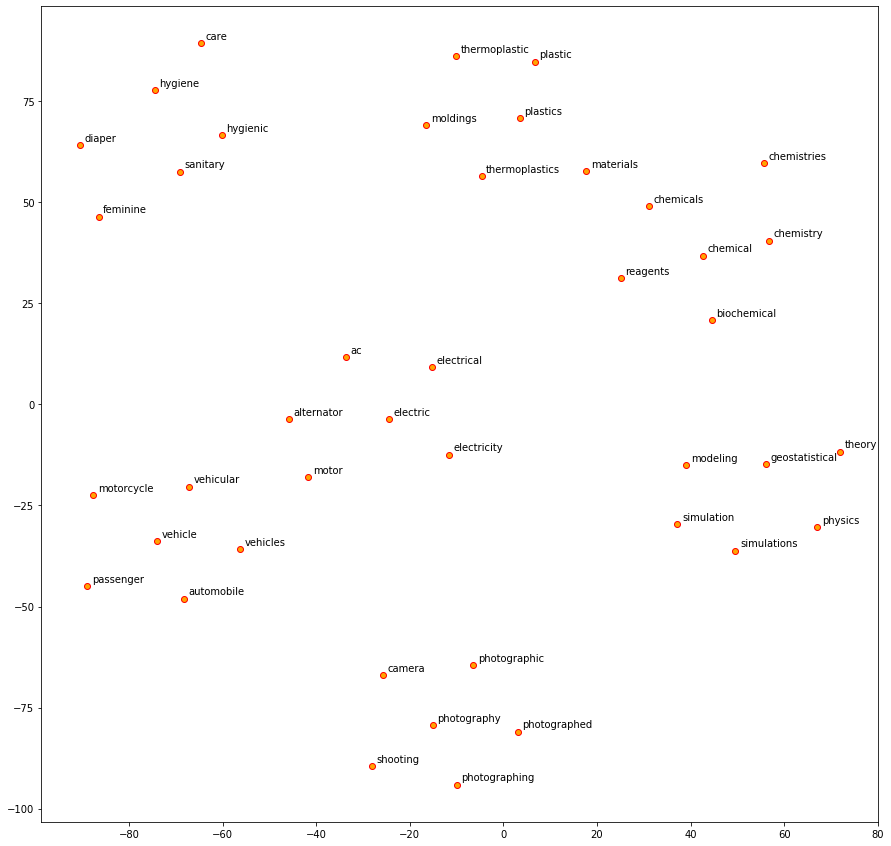

In [255]:
tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=15)
np.set_printoptions(suppress=True)
result = tsne.fit_transform(sample_wv)
labels = words

plt.figure(figsize=(15, 15))
plt.scatter(result[:, 0], result[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, result[:, 0], result[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')